# 1) Import Libraries


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2) Import Dataset

In [3]:
IceCream_df=pd.read_csv('IceCreamData.csv')

In [4]:
IceCream_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [5]:
IceCream_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
IceCream_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
IceCream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
max=IceCream_df[IceCream_df['Revenue']==1000]
max

,Temperature,Revenue
444,45.0,1000.0


In [9]:
min=IceCream_df[IceCream_df['Revenue']==10]
min

,Temperature,Revenue
402,0.0,10.0


# 3)Visualize dataset

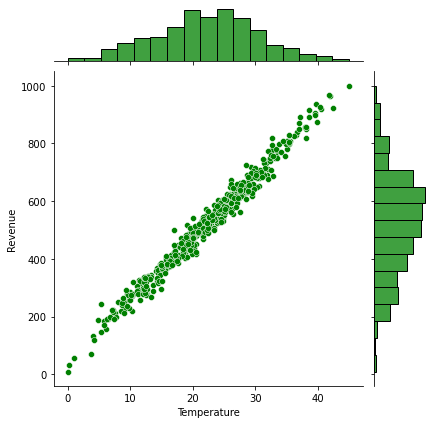

In [10]:
sns.jointplot(x='Temperature',y='Revenue', data=IceCream_df,color='green')

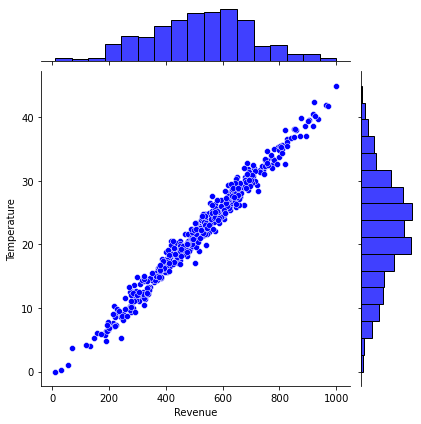

In [11]:
sns.jointplot(x='Revenue',y='Temperature', data=IceCream_df,color='blue')

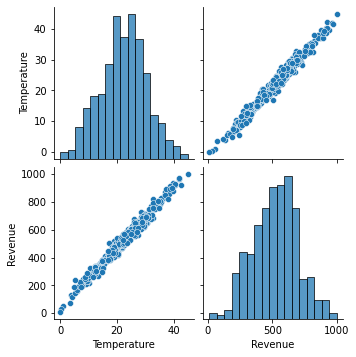

In [12]:
sns.pairplot(IceCream_df)

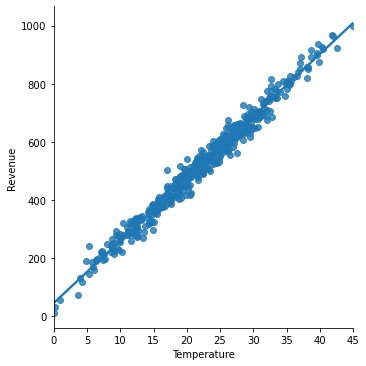

In [13]:
sns.lmplot(x='Temperature',y='Revenue', data=IceCream_df)

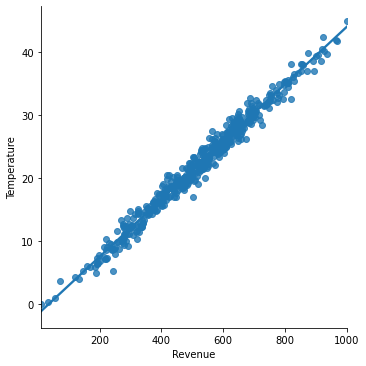

In [14]:
sns.lmplot(x='Revenue',y='Temperature', data=IceCream_df)

# 4) CREATE TESTING AND TRAINING DATASET

In [15]:
X=IceCream_df['Temperature']
X

0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
         ...    
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736
Name: Temperature, Length: 500, dtype: float64

In [16]:
y=IceCream_df['Revenue']
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [57]:
X = np.asarray(X)
X = np.reshape(X, (-1, 1))
y = np.asarray(y)
y = np.reshape(y, (-1, 1))

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20, random_state=42)

In [19]:
X_train.shape

(400, 1)

In [20]:
X_test.shape

(100, 1)

In [21]:
y_test.shape

(100, 1)

In [22]:
y_train.shape

(400, 1)

# 5) Train Model

In [50]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)


LinearRegression()

In [51]:
print('Linear Model Coefficient(m)', regressor.coef_)
print('Linear Model Coefficient(b)', regressor.intercept_)


Linear Model Coefficient(m) [[21.38197386]]
Linear Model Coefficient(b) [46.80464128]


# 6) Test Model

In [52]:
y_predict=regressor.predict(X_test)

In [53]:
y_predict

array([[681.93870622],
       [632.14474995],
       [559.64360486],
       [498.90609993],
       [615.45939165],
       [304.72417213],
       [285.79420948],
       [315.60842003],
       [506.26427154],
       [685.69744019],
       [723.96030494],
       [400.84625166],
       [431.61634142],
       [671.36600031],
       [ 52.51422053],
       [198.77682819],
       [523.08595488],
       [563.90495549],
       [583.83579144],
       [682.24517768],
       [556.2285085 ],
       [783.88766163],
       [655.44109362],
       [570.0735459 ],
       [912.21841974],
       [664.74778505],
       [315.96428407],
       [631.00983241],
       [731.1169322 ],
       [698.02984963],
       [435.08453949],
       [471.22058847],
       [710.29440571],
       [799.81874771],
       [641.02153776],
       [493.66044553],
       [744.9247237 ],
       [318.10831232],
       [262.69083171],
       [132.04437543],
       [582.55738268],
       [230.41054193],
       [547.29799783],
       [393

Text(0.5, 1.0, 'Revenue Generated Vs Temperature')

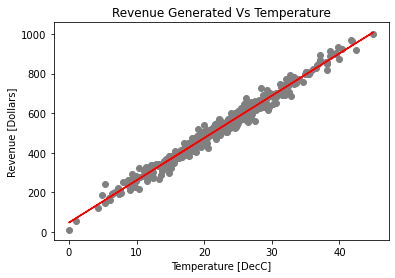

In [54]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DecC]')
plt.title('Revenue Generated Vs Temperature')

Text(0.5, 1.0, 'Revenue Generated Vs Temperature')

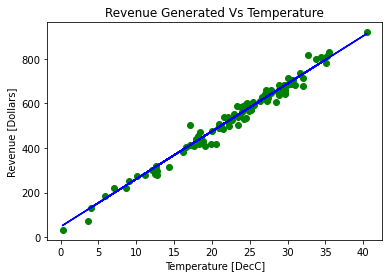

In [55]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DecC]')
plt.title('Revenue Generated Vs Temperature')

In [62]:
#Predicting revenue when Temperature is 40 degree C
T=40
T = np.asarray(T)
T = np.reshape(T, (-1, 1))
revenue=regressor.predict(T)
revenue

array([[902.08359549]])

In [63]:
#Predicting revenue when Temperature is 0 degree C
T=0
T = np.asarray(T)
T = np.reshape(T, (-1, 1))
revenue=regressor.predict(T)
revenue

array([[46.80464128]])

In [65]:
#Predicting revenue when Temperature is 10 degree C
T=10
T = np.asarray(T)
T = np.reshape(T, (-1, 1))
revenue=regressor.predict(T)
revenue

array([[260.62437983]])